In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/perfume-dataset/Perfumes_dataset.csv')
df.head()

,brand,perfume,type,category,target_audience,longevity
0,dumont,nitro red,edp,Fresh Scent,Male,Strong
1,dumont,nitro pour homme,edp,Fresh Scent,Male,Strong
2,dumont,nitro white,edp,Fresh Scent,Unisex,Strong
3,dumont,nitro blue,edp,Fresh Scent,Unisex,Strong
4,dumont,nitro green,edp,Fresh Scent,Unisex,Strong


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            1004 non-null   object
 1   perfume          1004 non-null   object
 2   type             1004 non-null   object
 3   category         1004 non-null   object
 4   target_audience  1004 non-null   object
 5   longevity        1004 non-null   object
dtypes: object(6)
memory usage: 47.2+ KB


In [5]:
df.isnull().sum()

brand              0
perfume            0
type               0
category           0
target_audience    0
longevity          0
dtype: int64

In [6]:
for cols in df:
    if cols in ['perfume','category']:
        print("Value counts for ",cols,"(Top 10)")
        print(df[cols].value_counts(dropna=True).head(10))
        print("\n")
    else:
        print("Value counts for ",cols)
        print(df[cols].value_counts(dropna=True))
        print("\n")

Value counts for  brand
brand
Jean Paul Gaultier     94
paris corner           77
armaf                  70
Al Haramain            43
fragrance world        42
Lattafa                36
Azzaro                 35
Hugo Boss              33
Giorgio Armani         30
Afnan                  30
Dior                   29
Ajmal                  29
Hermès                 28
Prada                  27
Maison Alhambra        25
Louis Vuitton          24
Creed                  24
Victoria's Secret      24
Carolina Herrera       19
Dolce & Gabbana        19
Versace                18
xerjoff                18
Parfums de Marly       17
Yves Saint Laurent     17
Paco Rabanne           15
Guerlain               14
Mancera                14
Tom Ford               13
Valentino              12
Ralph Lauren           11
Jo Malone              11
dumont                 10
Diptyque               10
Montblanc               9
rayhaan                 8
zimaya                  8
Zimaya                  7
khadlj  

In [7]:
# Standardize Male/Female
df['target_audience'] = df['target_audience'].replace({
    'Men': 'Male',
    'Women': 'Female'
})

# Remove irrelevant/mistyped values
df = df[~df['target_audience'].isin(['Gourmand', 'Target Audience'])]

In [8]:
sns.set()

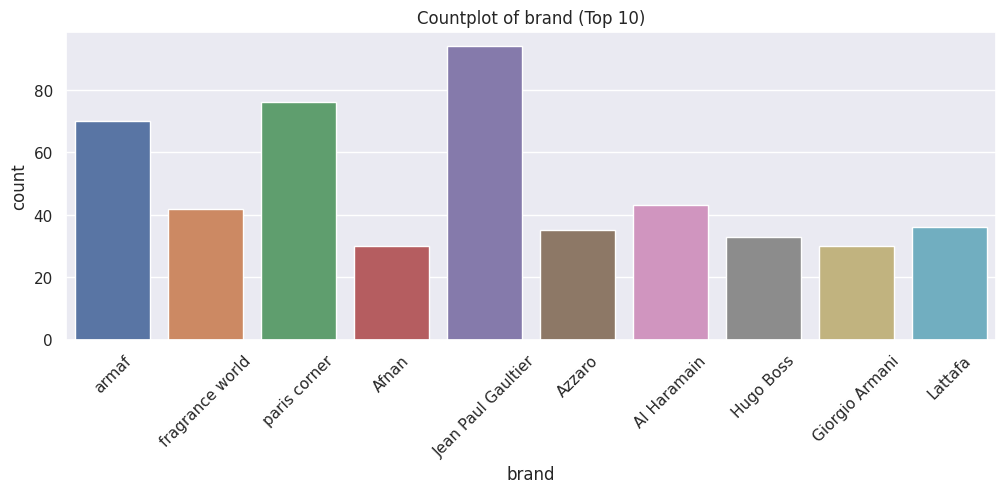

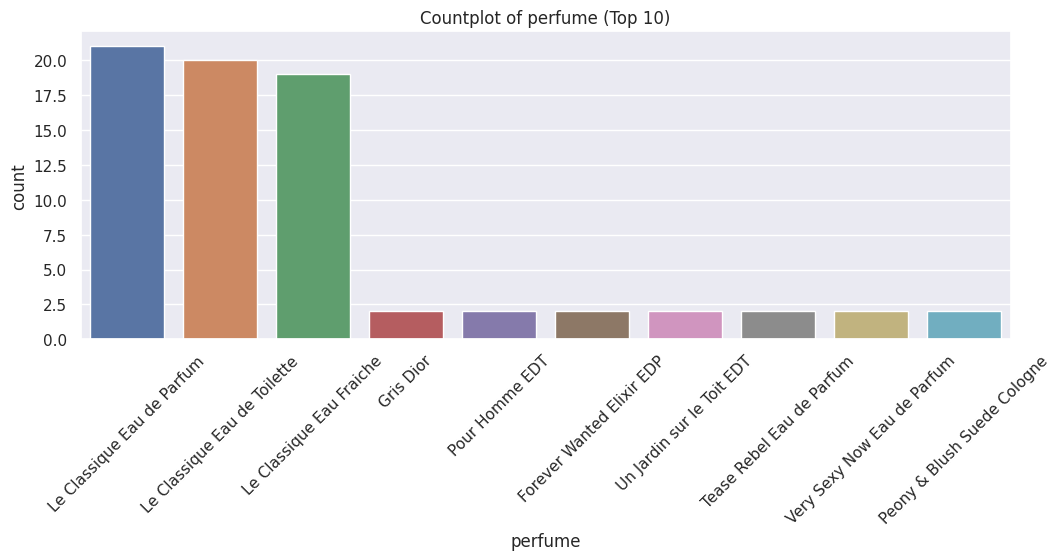

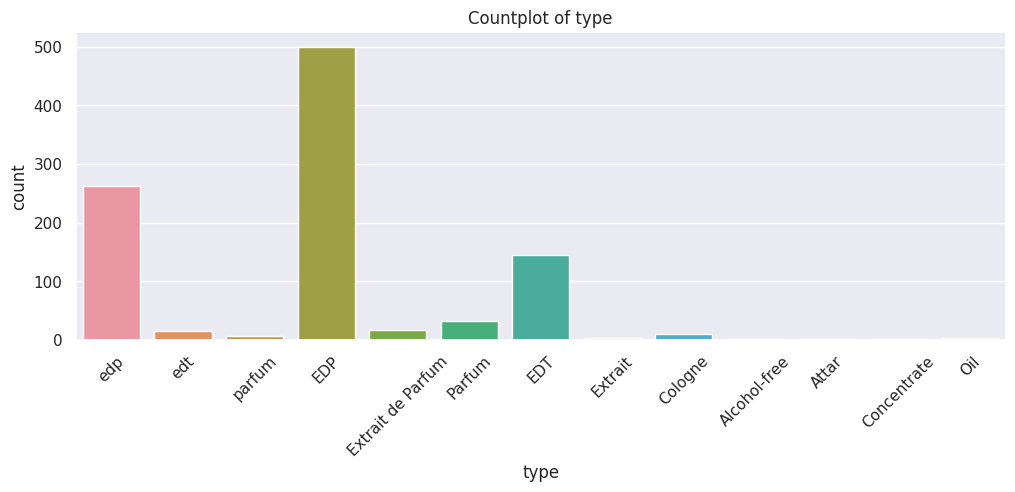

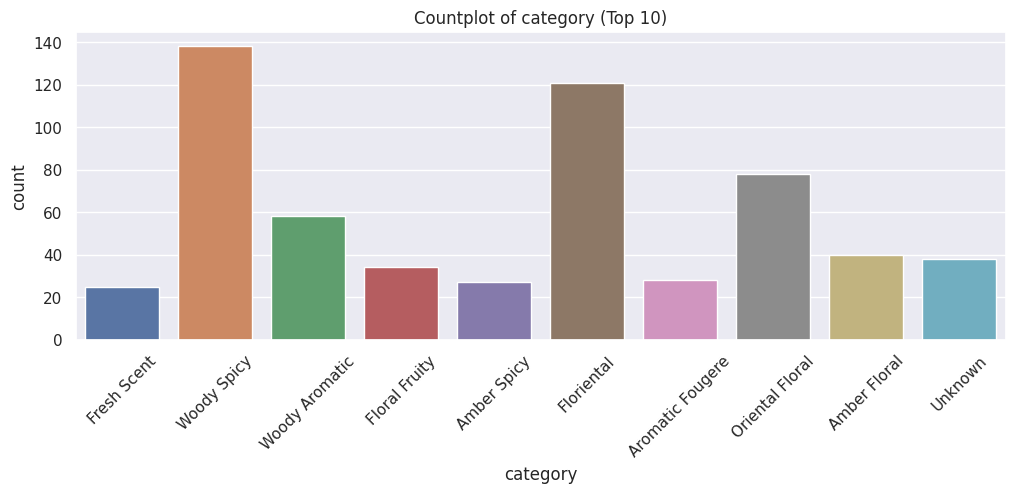

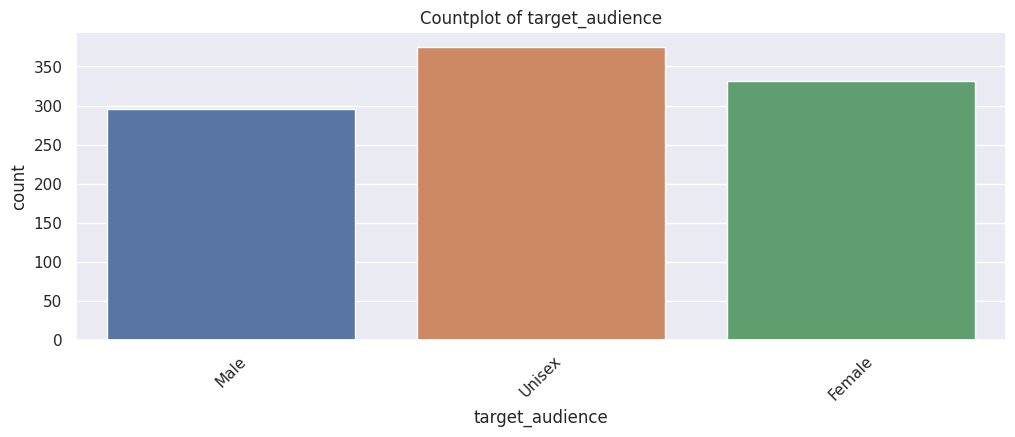

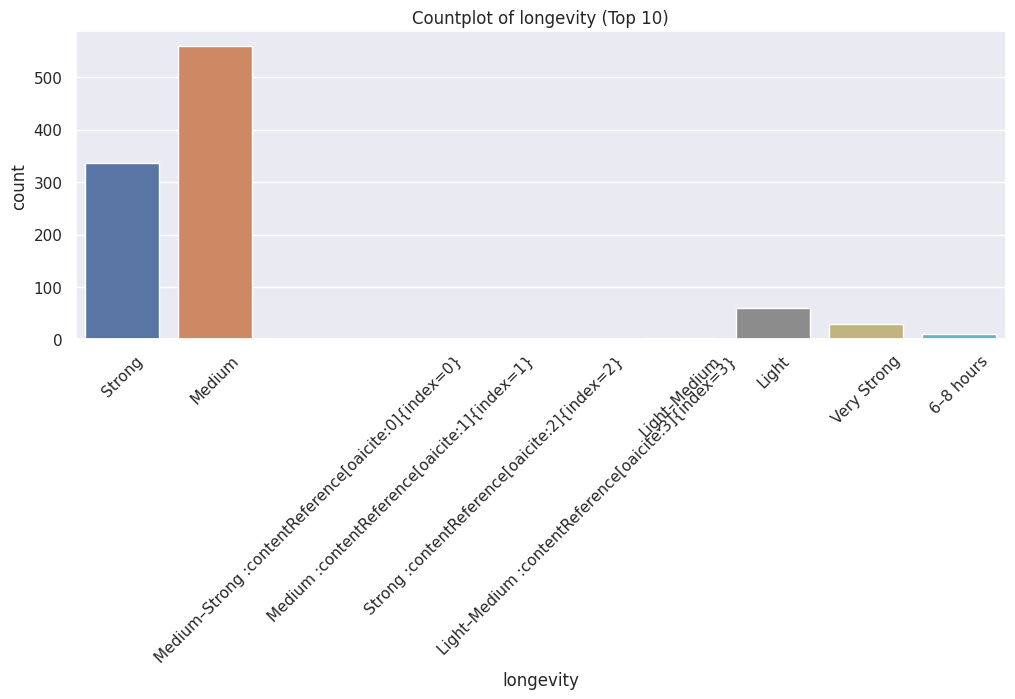

In [9]:
for col in df.columns:
    plt.figure(figsize=(12,4))

    if col in ['brand','perfume','category','longevity']:
        # plot only top 10 categories
        top10 = df[col].value_counts().head(10).index
        sns.countplot(x=col, data=df[df[col].isin(top10)])
        plt.title(f"Countplot of {col} (Top 10)")
    else:
        sns.countplot(x=col, data=df)
        plt.title(f"Countplot of {col}")

    plt.xticks(rotation=45)
    plt.show()

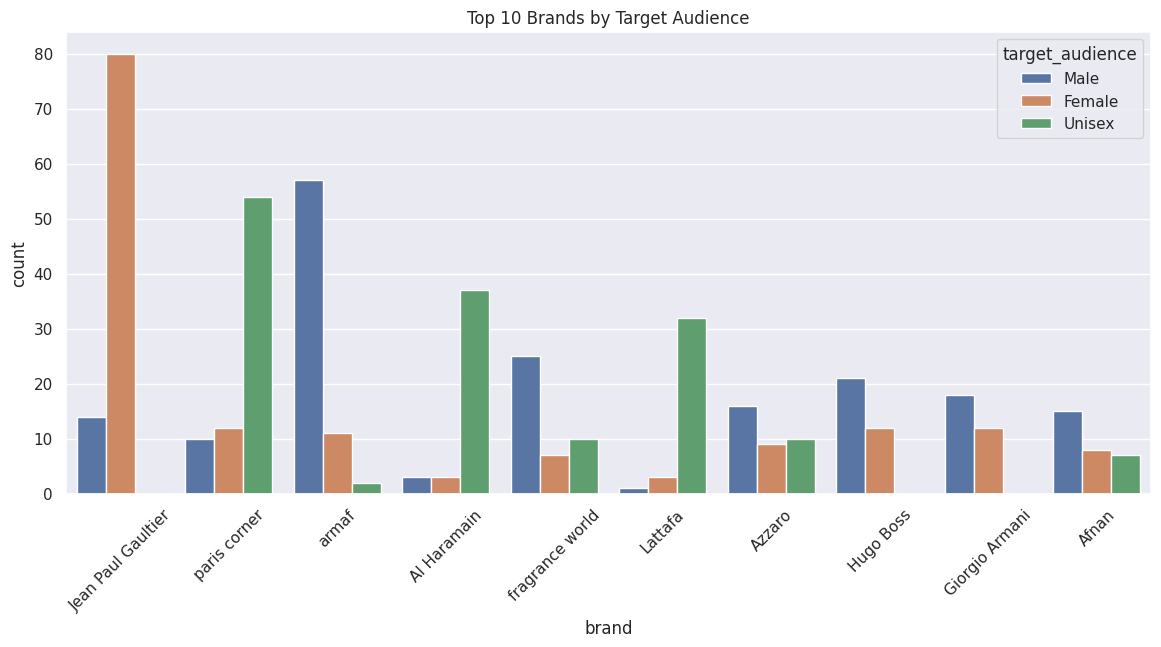

In [10]:
top10_brands = df['brand'].value_counts().head(10).index

plt.figure(figsize=(14,6))
sns.countplot(x='brand', hue='target_audience', 
              data=df[df['brand'].isin(top10_brands)],
              order=top10_brands)
plt.xticks(rotation=45)
plt.title("Top 10 Brands by Target Audience")
plt.show()